## 1. Fragestellung(en) und Datenbeschaffung
Gruppe: Phi Phi Cung und Lou-Salomé Frehner
### 1.1 Titel: 
- Sterblichkeitsrate von Atemwegsinfektionen pro 100'000 Personen von 1950 bis 2022
### 1.2 Fragestellung:
- "Welche Länder hatten von 1950 bis 2022 die grösste Zunahme bzw. Abnahme der Sterblichkeitsrate durch Atemwegsinfektionen?"
### 1.3 Datenquelle(n):
https://ourworldindata.org/grapher/respiratory-infection-death-rate-who-mdb




### 1.4 Daten beschaffen und laden

In [6]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
# lade hier deine Daten
df = pd.read_csv('respiratory-infection-death-rate-who-mdb.csv', skiprows=1, 
                 names=['Entity','Code','year','Age-standardized deaths from respiratory infections in both sexes per 100,000 people'])
df.head()


,Entity,Code,year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
0,Albania,ALB,1987,69.32097
1,Albania,ALB,1988,59.96708
2,Albania,ALB,1989,75.36185
3,Albania,ALB,1992,64.09694
4,Albania,ALB,1993,69.78366


## 2. Daten vorbereiten 
Der Datensatz hat das Long-Format:

Jede Zeile repräsentiert eine Beobachtung, bestehend aus den folgenden Spalten:
- Länder: Der Name des Landes (z. B. Kanada, Australien).
- Code: Der standardisierte Ländercode (z. B. CAN, AUS).
- Jahr: Das Jahr der Beobachtung (z. B. 1950, 2022).
- Todesfälle durch Atemwegsinfektionen: Die altersstandardisierte Sterblichkeitsrate pro 100.000 Personen.
- Im Long-Format sind die Werte für die Todesfallrate in einer Spalte organisiert, während die übrigen Spalten Kategorien oder Indizes darstellen.

Die Datentypen in deinem Datensatz sind:

Länder: object (String; textbasiert, z. B. "Kanada").
Code: object (String; textbasiert, z. B. "CAN").
Jahr: int64 (Ganzzahl; numerisch, z. B. 1950, 2022).
Todesfälle: float64 (Dezimalzahl; kontinuierlich, z. B. 69.32).

In [9]:
df_pivot = df.pivot(index='Entity', columns='year', values='Age-standardized deaths from respiratory infections in both sexes per 100,000 people')
df_pivot.head()

year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.206214,19.790750,32.962810,17.233988,12.686172,26.913685,17.549429,25.599234,103.138080,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.840980,41.425716,46.261000,55.549500,52.927692,49.750935,50.036976,129.054060,196.347100,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.797947,14.825234,18.150202,21.427942,22.369265,33.270714,32.871216,136.314000,178.072220,59.339447
Australia,44.541817,46.18928,40.555084,36.833664,40.231956,35.56524,39.746117,42.80438,34.36434,47.42999,...,5.370212,6.066640,6.208516,6.525617,8.127273,5.351823,7.287782,5.021166,5.508817,19.580791


## 3. Statistik der Rohdaten (Analyse im Long-Format)
über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Year* enthält 117 verschiede Länder
- Die Spalte *Codes* enthält 117 verschiedene Codes
- Es sind Daten zwischen 1950 and 2022 vorhanden
- Die Todesfälle durch Atemwegsinfektionen streuen zwischen 1.05 und 377.28 pro 100.000 Personen.
- Die Variable "Sterblichkeitsrate durch Atemwegsinfektionen" ist kontinuierlich, da sie numerische Werte mit Dezimalstellen enthält. 
- ⁠ Es gibt insgesamt 4 Spalten in den Daten.
- Für jede Spalte liegen keine fehlenden Werte vor (alle Daten sind vollständig).
- Das Jahr mit den meisten Datenpunkten ist 2010 (96 Einträge). 
- ⁠Länder wie Kanada, Niederlande, Japan, Australien und Schweden haben jeweils über 72 Einträge. 
- ⁠Das Histogramm zeigt, dass die meisten Todesfälle pro 100.000 Personen im Bereich unter 50 liegen, mit einigen Ausreissern über 300.




In [12]:
df_long

,Entity,year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
0,Albania,1950,NaN
1,Antigua and Barbuda,1950,NaN
2,Argentina,1950,NaN
3,Armenia,1950,NaN
4,Australia,1950,44.541817
...,...,...,...
8536,United Kingdom,2022,NaN
8537,United States,2022,NaN
8538,Uruguay,2022,NaN
8539,Uzbekistan,2022,NaN


### 3.1 Analyse Länder

In [13]:
print('Anzahl verschiedener Länder: ', len(df['Entity'].unique()))

Anzahl verschiedener Länder:  117


In [14]:
# Anzahl Datenpunkte pro Land
df['Entity'].value_counts()

Entity
Canada                   73
Netherlands              73
Japan                    72
Australia                72
Sweden                   72
                         ..
Sao Tome and Principe     3
Lebanon                   3
Cape Verde                2
Saudi Arabia              2
Syria                     1
Name: count, Length: 117, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

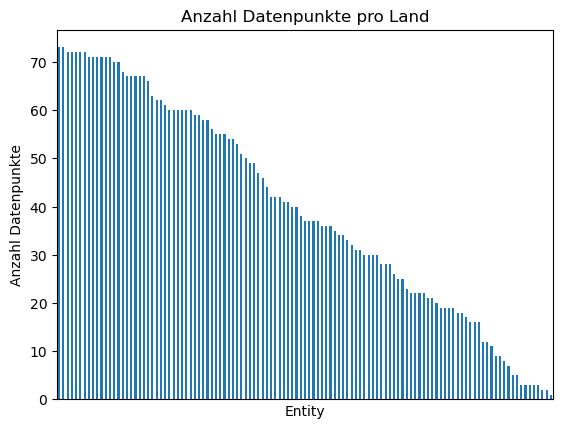

In [15]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

### 3.2 Analyse Codes

In [16]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  117


In [17]:
# Anzahl Datenpunkte pro Land
df['Code'].value_counts()

Code
CAN    73
NLD    73
JPN    72
AUS    72
SWE    72
       ..
STP     3
LBN     3
CPV     2
SAU     2
SYR     1
Name: count, Length: 117, dtype: int64

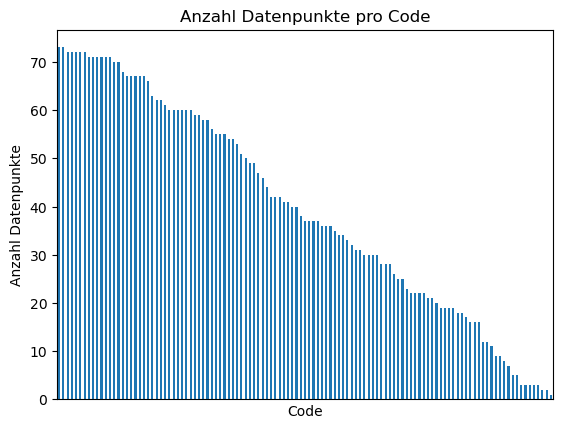

In [18]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [19]:
print('Anzahl verschiedener Jahre: ', len(df['year'].unique()))

Anzahl verschiedener Jahre:  73


In [20]:
# Anzahl Datenpunkte pro Jahr
df['year'].value_counts().sort_index()

year
1950     9
1951    17
1952    18
1953    19
1954    20
        ..
2018    82
2019    80
2020    65
2021    51
2022    15
Name: count, Length: 73, dtype: int64

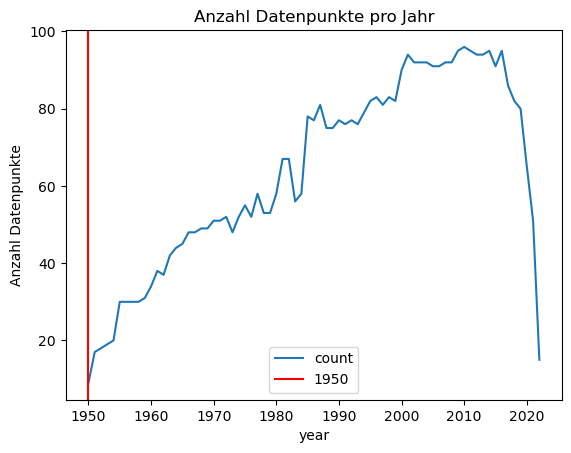

In [21]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = df['year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1950, color='red',label='1950') # rote Linie bei 1950 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse

In [22]:
df.describe()

,year,"Age-standardized deaths from respiratory infections in both sexes per 100,000 people"
count,4641.000000,4641.000000
mean,1992.667313,34.196449
std,18.426826,32.514145
min,1950.000000,1.054690
25%,1979.000000,14.062974
50%,1995.000000,24.384080
75%,2008.000000,43.247025
max,2022.000000,377.275300


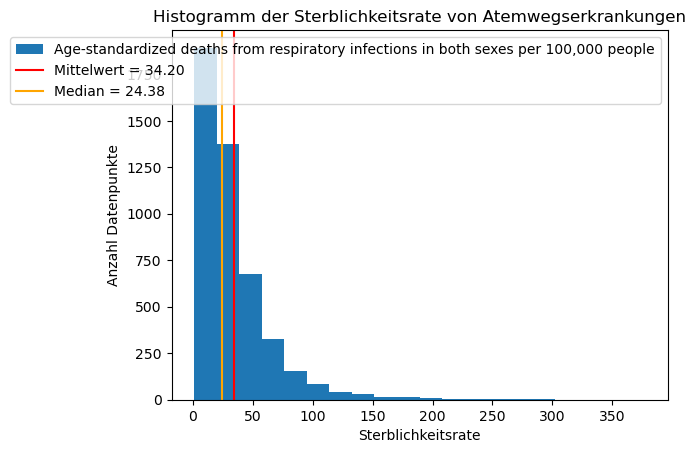

In [27]:
g = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].plot(kind='hist', bins=20, title='Histogramm der Sterblichkeitsrate von Atemwegserkrankungen', 
                           xlabel='Sterblichkeitsrate', ylabel='Anzahl Datenpunkte')
mean = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].mean()
g.axvline(x=df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].median()
g.axvline(x=df['Age-standardized deaths from respiratory infections in both sexes per 100,000 people'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

